# Support Vector Machines

The original SVM algorithm was invented by Vladimir N. Vapnik. The current standard approach ("soft margin" SVM) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVM constructs a hyperplane or set of hyperplanes in a high or infinite dimensional space. SVM can be used for classification, regression, or other tasks. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training data point of any class (so-called functional margin). One single SVM model is for 2 label classification, where label is $y \in \{-1, 1\}$. The hyperplane we want to find to separate the 2 classes is "h". We use the parameters $\vec{w}$ and $b$ to write our classifier as 

$$h_{w,b}(\vec{x}) = g(\vec{w}^T \vec{x} + b)$$

Here, $g(Z) = 1$ if $z \geq 0$ and $g(Z) = -1 $ otherwise.

$\vec{x} \in \mathbf{R}^p$, $y \in \{-1, 1\}$

$(\vec{x}, y)$ is called an example.

## Geometric margin

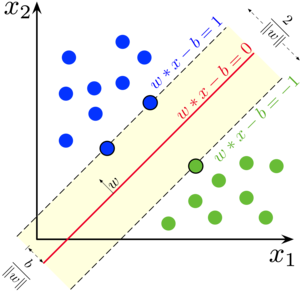

In [2]:
from utils import disp
disp('svm.png')

The decision boundary corresponding to $(w,b)$ is shown along with the vector $\vec{w}$. Note that $\vec{w}$ is orthogonal to the separating hyperplane. Consider the opposing point, $x_1$ (say, a blue point on the boundary) and $x_2$ (say, a green point on the boundary line) which represents training examples closest to each other with labels $y_1 = 1$ and $y_2 = -1$. The distance to the decision boundary or the geometric margin $\rho$ is half of the line segment of $x_1, x_2$, one minimum margin on each side.

Next, $\vec{w}$ and $b$ are scaled such that the closest points are the line $|w^T x + b| = 1$

We can write the constraint that all points are no closer than lines $| w^T x + b | = 1$ (either side of the plane) by using the labels for signs: $y (w^T x + b) \geq 1$ 

For example, 

if $y = +1$, $w^T x + b \geq 1$, and therefore $y(w^T x + b) \geq 1$. 

if $y = -1$, $w^T x + b \leq 1$, and therefore $y(w^T x + b) \geq 1$)

In other words, the constraints state that all functional margins are at least $1$.

So, we know $w^T x_1 + b = 1$ and $w^T x_2 + b = -1$ (see above), then $w^T (x_1 - x_2) = 2$

Considering that $w$ and $x_1 - x_2$ are parallel vectors, then 

$$||w^T (x_1 - x_2) || = ||w|| \times |x_1 - x_2|| = 2$$

Therefore, $||x_1 - x_2|| = \frac{2}{||w||}$

Since $||x_1 - x_2|| = 2 \rho$, then (by transitive property) $\rho = \frac{1}{||w||}$

The minimum geometric margin is $\rho = \frac{1}{||w||}$.

So, how do we find the optimal boundary which maximizes the separation of the two classes?

## Optimal Margin Classifier

**We want to find a decision boundary that maximizes the geometric margin.** Assume that we are given a linearly separable training set (i.e. that is possible to separate the positive and negative samples using some separating hyperplane). To find the decision boundary that maximizes the geometric margin, we maximize the margin $\rho = \frac{1}{||w||}$ s.t. all points are no closer (on either side) than $|w^T x + b| = 1$ to the separating hyperplane. We can rewrite the constraints on $y(w^T x + b) \geq 1$ for all training data points $x$ with label $y \in \{-1, 1\}$. To make the math nicer, we can write the objective in terms of $||w||^2$. 

$$
\begin{equation}min_{w,b} \frac{1}{2} ||w||^2\end{equation}
\begin{equation} \hbox{s.t.} y_i (w^T x_i + b) \geq 1, i=1, 2, ..., m \end{equation}
$$


$$max_{w,b} \frac{1}{||w||} \hbox{s.t.} y_i (w^T x_i + b) \geq 1, i=1,...,m$$

$$min_{w,b} ||w|| \hbox{s.t.} y_i (w^T x_i + b) \geq 1, i=1,...,m$$

This is known as the SVM-primal optimization problem. The above is an optimization problem with a convex quadratic objective (1) and only linear constraints (2). We will use the **lagrange duality** to solve the above constrained optimization problem.

## Convex quadratic optimization - Lagrange duality

Textbook: Boyd and Van den Berglue

### Primal problem 

Consider the following problem $ \min_{x} f(x)$ s.t. $g_i(x) \leq 0$, for $i=1, ..., k$ and $h_j(x) = 0$, for $j=1,...,l$.

Conventional SVM only uses $g(x)$ and does not use $h(x)$.

This is called the primal optimization problem. It has unequality as well as equality constraints. Define the Lagrangian (which describes the state of a dynamic system in terms of position coordinates and their time derivatives)

$$L(x, \alpha, \beta) = f(x) + \sum_{i=1}^k \alpha_i g_i(x) + \sum_{j=1}^l \beta_j h_j(x)$$

where $\alpha_i \geq 0$, ($i=1, ..., k$) and $\beta_j$ ($j=1, ..., k$) are called lagrange multipliers. Consider the quantity $\theta_p(x) = \max_{\alpha, \beta} L(x, \alpha, \beta)$. In the problem $\theta_p(x)$, if $g_i(x) > 0$ or $h_j(x) \neq 0$, this violates any of the primal constraints. One can verify that 

$$\theta_p(x) = \max_{\alpha, \beta} L(X, \alpha, \beta) = \infty$$

Conversely, if the constraints are satisfied for a particular value of $x$, then $\theta_p(x) = f(x)$. So, 

$$
\theta_p = \begin{cases}
f(x)& \hbox{if x satisfies primal constraints}\\
0&o.w.\\
\end{cases}
$$

Hence, the minimization problem has been transformed to 

$$\min_{x} \theta_p(x) = \min_x \min_{\alpha, \beta} L(x, \alpha, \beta)$$

Define $p^\star = \min_{x} \theta_p(x)$ as the value of the primal problem. In fact, we see that hte primal problem has the same solution

## Dual problem

Define $\theta_D(\alpha, \beta) = \min_{x} L(x, \alpha, \beta)$. Pose the dual optimization problem as 

$$\max_{\alpha, \beta} \theta_D(\alpha, \beta) = \max_{\alpha, \beta} \min_x L(x, \alpha, \beta)$$

define the optimal value $d^\star = \max_{\alpha, \beta} \theta_D(\alpha, \beta)$ as the value of the dual problem.

We can see that the dual problem $d^\star$ is pretty similar to our primal problem $p^\star$, except tha thte order of the "max" and "min" are now exchanged.

**The dual problem is much easier to solve than the primal problem.** In fact, there is some relationship between the primal and dual problems: 

$$\max \min (f) \leq \min \max (f)$$

This means that: 

$$d^\star = \max_{\alpha, \beta} \min_x L(x, \alpha, \beta) \leq \min_{x} \max_{\alpha, \beta} L(x, \alpha, \beta) = p^\star$$

That is, $d^\star \leq p^\star$. Therefore, we can use the dual problem to find a lower bound.

The term $p^\star - d^\star$ is the **duality gap**. In general, the dualilty gap is not necessarily equal to zero. Under some conditions (known as Slater's conditions), the duality gap is 0. We say that strong duality holds.

## Saddle point

Resource: (Convex Optimization - Boyd and Vandenberghe, 2004)

**Def:** We define a _saddle point_ as ($x^\star$, $\alpha^\star$) s.t. $\forall x \in \mathbf{R}^n$, $\forall \alpha \geq 0$, 

$$L(x^\star, \alpha) \leq L(x^\star, \alpha^\star) \leq L(x, \alpha^\star)$$

**Thm. 1:** (Saddle point theorem) Let $x^\star \in \mathbf{R}^n$. If there exists $\alpha^\star \geq 0$,s.t. $(x^\star, \alpha^\star)$ is a saddle point for the Lagrangian $L$, then $x^\star$ solves (P). Conversely, if $x^\star$ is a solution of (P) at which the Slater's constraint qualification is satisfied, then there exists $\alpha^\star \geq 0$ s.t. (x^\star, \alpha^\star)$ is a saddle point for $L$. This is also known as the weak duality theorem.

Question: Why is the space geometrically shaped like a saddle?

**Thm. 2:** If a saddle point exists, then $p^\star = d^\star$. The saddle point theorem says that if $(x^\star, \alpha^\star$) is a saddle point for $L$, then $x^\star$ solves the primal problem and $\alpha^\star$ solves the dual problem, and the optimal values in the primal ($p^\star$) and dual problem ($d^\star$) coincides (i.e. $p^\star = d^\star$). This is known as the strong duality theorem and uses slater's constraint qualifications.

## Karush Kuh Tucker (KKT) conditions

The KKT conditions, also known as Kuhn-Tucker conditions, are 1st derivative tests (also called 1st order necessary conditions) for a solution in in nonlinear programming to be optimal, provided that some regularity conditions are satisfied. The KKT conditions were originally named after Harold W. Kuhn and Albert W. Tucker, who first published the conditions in 1951. Later, scholars discovered that the necessary conditions for this problem had been stated by William Karush in his master's thesis in 1939.

**Thm:** (Karush-Kuhn-Tucker) Suppose that he objective function $f : \mathbf{R}^n \xrightarrow{} \mathbf{R}$ and the constraint function $g : \mathbf{R}^n \xrightarrow{} \mathbf{R}$ and $h_j: \mathbf{R}^n \xrightarrow{} \mathbf{R}$ are continuously differentiable at a point $x^\star \in \mathbf{R}^n$.  $x^\star$ is a solution to the optimization problem iff there exists $\vec{\alpha}$ and $\vec{\beta}$ s.t.

i. Stationarity : $\triangledown f(x^\star) - \sum_{i=1}^k \alpha_i \triangledown g_i (x^\star) - \sum_{j=1}^l \beta_j \triangledown h_j(x^\star) = 0$

First derivative equals zero. Let's say you have a function $h(u)$, if there is a solution $u^\star$, then if you look at $h^\prime(u^\star) = 0$

ii. Primal feasibility: $g(x^\star) \leq 0$ for $i=1, ..., k$ and $h_j(x^\star) = 0$ for $j = 1, ..., l$

The primal problem should have a solution.

iii. Dual feasibility:  $\alpha_i \geq 0$ for $i=1, ..., k$

The dual problem should have a solution.

iv. Complementary slackness (c.s.):  $\alpha_i g_i(x^\star) = 0$ for $i=1, ..., k$

This applies only to inequality constraints. For the $i^{\hbox{th}}$ inequality constraint, c.s. tells us that at $x^\star$ either $g_i(x^\star) = 0$ or the corresponding dual variable $\alpha_i = 0$.  If $g_i(x^\star) = 0$, we say that the inequality constraint is tight at $x^\star$ ($\alpha_i > 0$).

## Solution to SVM problem - Dual problem

Recall our SVM primal problem:

$\min_{w,b} \frac{1}{2} ||w||^2$ s.t. $y_i (w^\prime x_i + b) \geq 1$ for $i=1,..., m$

We will first transform the constraint to standard form.

**Step 1:** Constriant transformed

$g_i(w, b) = -y_i(w^\prime x_i + b) + 1 \leq 0$, $i=1, ..., m$

**Step 2:** Lagrangian

$L(w, b, \alpha) = \frac{1}{2}||w||^2 - \sum_{i=1}^m \alpha_i [y_i (w^\prime x_i + b) - 1]$

where $\alpha_i$ are the lagrangian multipliers. The intuitive meaning of $\alpha_i$ is how important is instance $i$ in forming the final solution. $\alpha_i = 0$ means the instance $i$ is not important at all. 

To find the dual problem, we first minimize $L(w, b, \alpha)$ wrt $w$ and $b$ (for fixed $\alpha$) in order to get $\theta_d = \min_{w,b} L(w,b,\alpha)$

**Step 3:** Differentiate $L$ wrt $w, b$ and set the differential to $0$.

For $w$, 
$$\begin{align*}
\frac{\delta L(w, b, \alpha)}{\delta w} &= w \times \sum_{i=1}^m \alpha_i y_i x_i = 0\\
w &= \sum_{i=1}^m \alpha_i y_i x_i\\
\end{align*}$$

For $b$,
$$\begin{align*}
\frac{\delta L(w, b, \alpha)}{\delta b} &= 0 - \sum_{i=1}^m \alpha_i y_i = 0\\
\sum_{i=1}^m \alpha_i y_i &= 0\\
\end{align*}$$

which provides a restriction on $\alpha$.

**Step 4:** Put the results from step 3 back into $L$

$$\begin{align*}
L(w, b, \alpha) &= \frac{1}{2}||w||^2 - \sum_{i=1}^m \alpha_i [y_i (w^\prime x_i + b) - 1]\\
&=\frac{1}{2} w^\prime w - \sum_i \alpha_i y_i w^\prime x_i - \sum_i \alpha_i y_i b + \sum \alpha_i \\
&= \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j - \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j - \sum_i \alpha_i y_i b + \sum_i \alpha_i\\
&= -\frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j - \sum_i \alpha_i y_i b + \sum_i \alpha_i\\
&= -\frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j x^\prime_i x_j + \sum_i \alpha_i\\
\end{align*}$$